In [4]:
#Kidus B
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import re
import seaborn as sns
sns.set_theme()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Dataset Shape: (10000, 18)


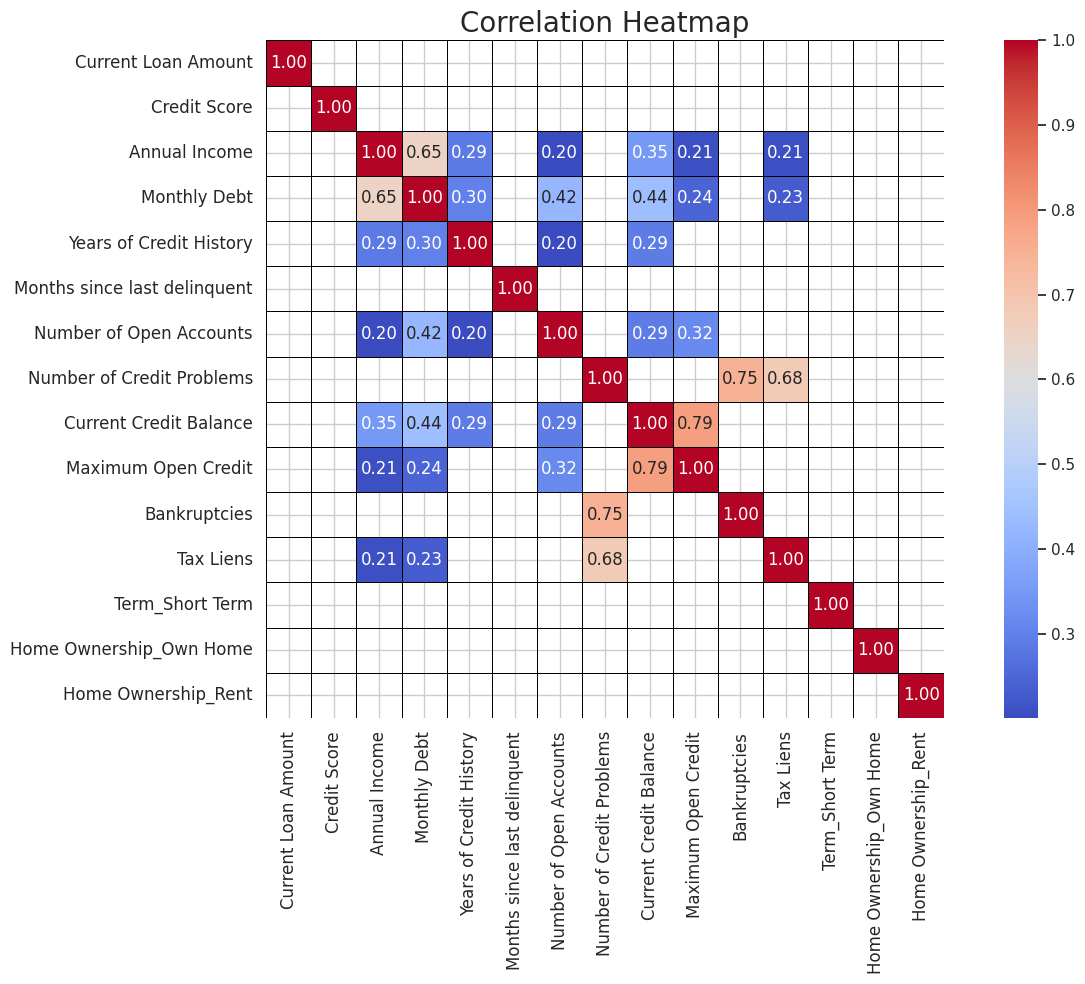

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


dataset = pd.read_csv('credit_score_predict.csv')


print("Dataset Shape:", dataset.shape)


dataset_cleaned = dataset.dropna()

# Sample a subset of the cleaned dataset for performance reasons
dataset_sample = dataset_cleaned.sample(frac=0.1, random_state=1)  #  I Used 10% of the data due to gpu issues  limitations

# Drop unnecessary columns for correlation analysis
columns_to_drop = ['Loan ID', 'Customer ID', 'Years in current job', 'Purpose']
dataset_sample = dataset_sample.drop(columns=columns_to_drop, errors='ignore')

# Convert categorical variables to a one-hot encoded format
categorical_columns = dataset_sample.select_dtypes(exclude=['number']).columns
dataset_encoded = pd.get_dummies(dataset_sample, columns=categorical_columns, drop_first=True)


correlation_matrix = dataset_encoded.corr()


plt.figure(figsize=(14, 10))
sns.set(style='whitegrid')
heatmap = sns.heatmap(
    correlation_matrix,
    cmap='coolwarm',
    cbar=True,
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    linecolor='black',
    mask=correlation_matrix < 0.2
)


plt.title("Correlation Heatmap", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()
plt.show()


In [6]:
import os


base_path = '/content/drive/MyDrive/CreditLimit/'
print(os.listdir(base_path))


['log.csv', 'credit_score_predict.csv']


In [7]:
#Data cleaning
dataset_2 = dataset.drop(['Loan ID', 'Customer ID', 'Months since last delinquent'], axis = 'columns')
dataset_2['Years in current job'].unique()

array(['10+ years', '2 years', '1 year', '< 1 year', '5 years', '7 years',
       '3 years', '6 years', '8 years', '4 years', nan, '9 years'],
      dtype=object)

In [8]:
import pandas as pd




dataset_3 = dataset_2.copy()

# Drop rows with any NaN values in the original dataset
dataset_3 = dataset_3.dropna()

# Removing non-digit characters from 'Years in current job' and extracting integers
dataset_3['refined_jobYears'] = dataset_3['Years in current job'].apply(
    lambda x: int(''.join(filter(str.isdigit, str(x)))) if pd.notnull(x) else 0  # Convert to int and handle NaNs
)


print(dataset_3[['Years in current job', 'refined_jobYears']].head())


  Years in current job  refined_jobYears
0            10+ years                10
1            10+ years                10
2              2 years                 2
3            10+ years                10
4            10+ years                10


In [9]:
dataset_3['refined_jobYears'].unique()

array([10,  2,  1,  5,  7,  3,  6,  8,  4,  9])

In [10]:
dataset_4 = dataset_3.replace(to_replace = ['HaveMortgage'], value = ['Home Mortgage'])
dataset_4['Home Ownership'].unique()
dataset_4.rename(columns = {'Credit Score' : 'Credit_Score','Current Credit Balance' : 'Current_Credit_Balance', 'Maximum Open Credit' : 'Maximum_Open_Credit' ,'Current Loan Amount' : 'Current_Loan_Amount', 'Annual Income' : 'Annual_income', 'Monthly Debt' : 'Monthly_Debt', 'Years of Credit History' : 'Years_of_Credit_History', 'Number of Open Accounts' : 'Number_of_Open_Accounts', 'Number of Credit Problems' : 'Number_of_Credit_Problems', 'Home Ownership' : 'Home_Ownership', 'Tax Liens' : 'Tax_Liens'}, inplace = True)
dataset_4.head(10)

,Current_Loan_Amount,Term,Credit_Score,Annual_income,Years in current job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,refined_jobYears
0,611314,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,9,0,621908,1058970,0.0,0.0,10
1,266662,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,11,0,679573,904442,0.0,0.0,10
2,153494,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10,0,38532,388036,0.0,0.0,2
3,176242,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,16,1,156940,531322,1.0,0.0,10
4,321992,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,14,0,359765,468072,0.0,0.0,10
5,202928,Short Term,741.0,760380.0,1 year,Rent,Debt Consolidation,6526.69,13.8,6,0,258647,476872,0.0,0.0,1
6,621786,Long Term,733.0,1783606.0,10+ years,Home Mortgage,Debt Consolidation,36563.98,15.3,42,0,281599,1449162,0.0,0.0,10
8,202466,Short Term,736.0,1068617.0,5 years,Rent,Debt Consolidation,18745.21,20.5,2,0,0,0,0.0,0.0,5
9,266288,Long Term,683.0,2031518.0,2 years,Rent,Debt Consolidation,12443.10,24.4,8,2,31445,251130,2.0,0.0,2
11,258104,Short Term,723.0,1284514.0,7 years,Rent,Debt Consolidation,6368.99,14.6,12,0,128402,266904,0.0,0.0,7


In [11]:
dataset_5 = dataset_4.replace(to_replace = ['other', 'major_purchase', 'Home Improvements', 'vacation', 'wedding', 'Take a Trip', 'moving', 'small_business'], value = ['Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Business Loan'])
dataset_5.head(10)

,Current_Loan_Amount,Term,Credit_Score,Annual_income,Years in current job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,refined_jobYears
0,611314,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,9,0,621908,1058970,0.0,0.0,10
1,266662,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,11,0,679573,904442,0.0,0.0,10
2,153494,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10,0,38532,388036,0.0,0.0,2
3,176242,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,16,1,156940,531322,1.0,0.0,10
4,321992,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,14,0,359765,468072,0.0,0.0,10
5,202928,Short Term,741.0,760380.0,1 year,Rent,Debt Consolidation,6526.69,13.8,6,0,258647,476872,0.0,0.0,1
6,621786,Long Term,733.0,1783606.0,10+ years,Home Mortgage,Debt Consolidation,36563.98,15.3,42,0,281599,1449162,0.0,0.0,10
8,202466,Short Term,736.0,1068617.0,5 years,Rent,Debt Consolidation,18745.21,20.5,2,0,0,0,0.0,0.0,5
9,266288,Long Term,683.0,2031518.0,2 years,Rent,Debt Consolidation,12443.10,24.4,8,2,31445,251130,2.0,0.0,2
11,258104,Short Term,723.0,1284514.0,7 years,Rent,Debt Consolidation,6368.99,14.6,12,0,128402,266904,0.0,0.0,7


In [12]:
#Dummies to handle Strings
dummies = pd.get_dummies(dataset_5.Home_Ownership)
dummies2 = pd.get_dummies(dataset_5.Term)
dataset_6 = pd.concat([dataset_5, dummies, dummies2], axis = 'columns')
dataset_7 = dataset_6.drop(['Years in current job', 'Home_Ownership', 'Purpose', 'Rent', 'Term', 'Short Term'], axis = 'columns')
dataset_7.rename(columns = {'Home Mortgage' : 'Home_Mortgage', 'Own Home' : 'Own_Home', 'Long Term' : 'Long_Term'})
dataset_7.dropna()

,Current_Loan_Amount,Credit_Score,Annual_income,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,refined_jobYears,Home Mortgage,Own Home,Long Term
0,611314,747.0,2074116.0,42000.83,21.8,9,0,621908,1058970,0.0,0.0,10,True,False,False
1,266662,734.0,1919190.0,36624.40,19.4,11,0,679573,904442,0.0,0.0,10,True,False,False
2,153494,709.0,871112.0,8391.73,12.5,10,0,38532,388036,0.0,0.0,2,False,False,False
3,176242,727.0,780083.0,16771.87,16.5,16,1,156940,531322,1.0,0.0,10,False,False,False
4,321992,744.0,1761148.0,39478.77,26.0,14,0,359765,468072,0.0,0.0,10,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,442596,739.0,1528968.0,19494.38,16.7,11,0,419235,656876,0.0,0.0,7,True,False,False
9995,157806,731.0,1514376.0,4795.41,12.5,9,0,87058,234410,0.0,0.0,6,False,False,False
9996,132550,718.0,763192.0,12401.87,9.9,8,0,74309,329692,0.0,0.0,4,True,False,False
9998,99999999,721.0,972097.0,12232.20,16.8,8,1,184984,240658,0.0,0.0,10,True,False,False


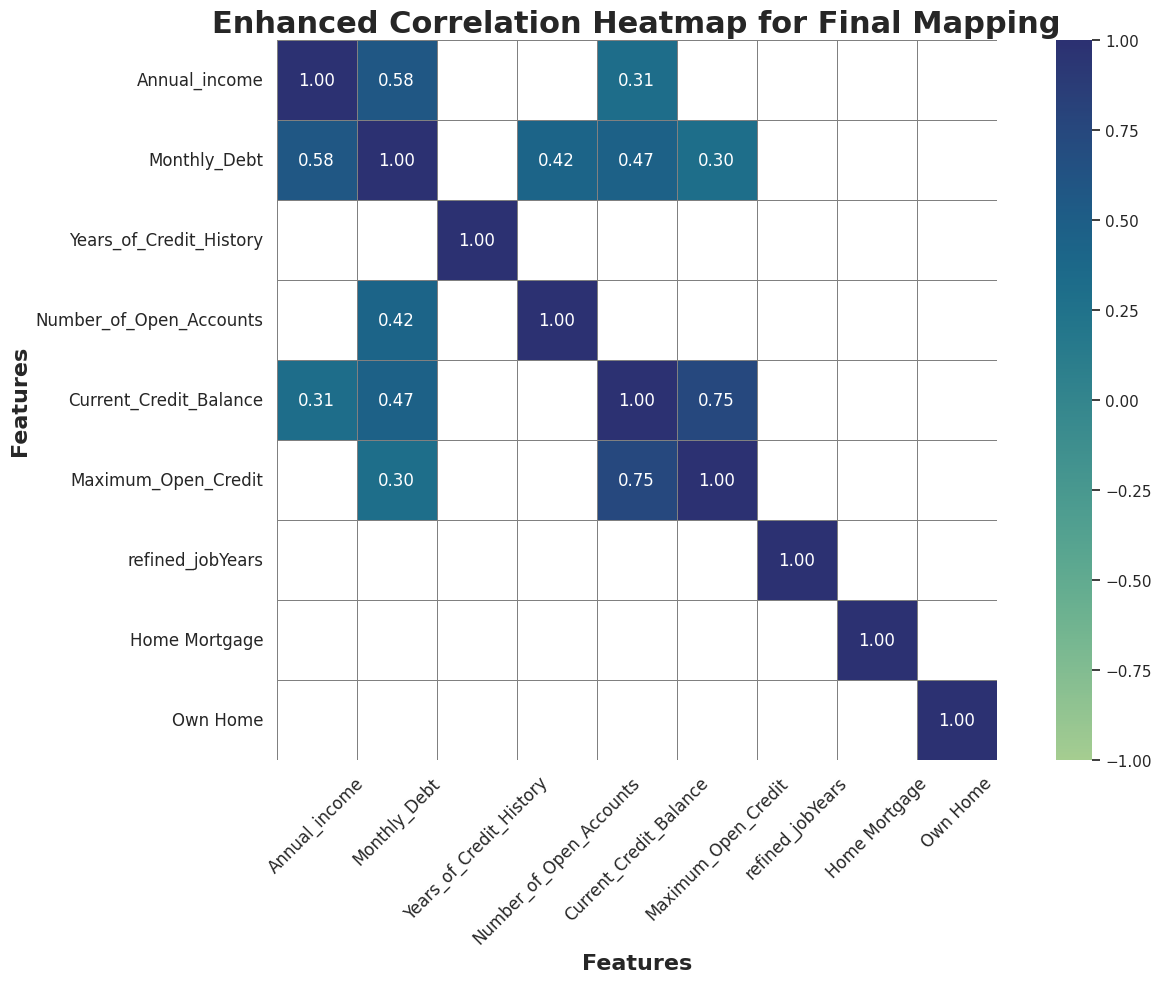

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Create Final_Mapping by dropping specified columns
Final_Mapping = dataset_7.drop(['Number_of_Credit_Problems', 'Long Term', 'Credit_Score', 'Current_Loan_Amount', 'Bankruptcies', 'Tax_Liens'], axis='columns')

# Calculate the correlation matrix
correlation_matrix = Final_Mapping.corr()


plt.figure(figsize=(14, 10))


cmap = sns.color_palette("crest", as_cmap=True)


heatmap = sns.heatmap(
    correlation_matrix,
    cmap=cmap,
    cbar=True,
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    linecolor='gray',
    mask=correlation_matrix.abs() < 0.3,
    vmin=-1,
    vmax=1,
    center=0
)


plt.title("Enhanced Correlation Heatmap for Final Mapping", fontsize=22, weight='bold')
plt.xlabel('Features', fontsize=16, weight='bold')
plt.ylabel('Features', fontsize=16, weight='bold')


plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)


plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




# Prepare the data for training
X = dataset_7.drop(['Maximum_Open_Credit', 'Number_of_Credit_Problems',
                     'Long Term', 'Credit_Score', 'Current_Loan_Amount',
                     'Bankruptcies', 'Tax_Liens'], axis='columns')
Y = dataset_7['Maximum_Open_Credit']

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=15)

# Initialize and train the Linear Regression model
LR = LinearRegression()
LR.fit(X_train, Y_train)

# Evaluate the model
score = LR.score(X_test, Y_test)
print(f"Model R^2 score: {score:.4f}")

# calculate and display additional metrics
Y_pred = LR.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.4f}")


Model R^2 score: 0.8642
Mean Squared Error: 266599564126.28
R^2 Score: 0.8642


In [15]:
#data prediction
def predict_credit_limit (Ownership, Annual_Income, Monthly_Debt, Years_of_Credit_History, Number_of_Open_Accounts, Current_Credit_Balance, refined_jobYears):
  ownership_index = np.where(X.columns == Ownership)[0]
  x = np.zeros(len(X.columns))

  x[0] = Annual_Income
  x[1] = Monthly_Debt
  x[2] = Years_of_Credit_History
  x[3] = Number_of_Open_Accounts
  x[4] = Current_Credit_Balance
  x[5] = refined_jobYears

  if ownership_index >= 0:
    x[ownership_index] = 1

  return LR.predict([x])[0]

In [16]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression



# Initialize and train  models
LR = LinearRegression()
RF = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit both models
LR.fit(X_train, Y_train)
RF.fit(X_train, Y_train)

#  data prediction using both models
def predict_credit_limit(Ownership, Annual_Income, Monthly_Debt, Years_of_Credit_History, Number_of_Open_Accounts, Current_Credit_Balance, refined_jobYears):
    ownership_index = np.where(X.columns == Ownership)[0]
    x = np.zeros(len(X.columns))

    x[0] = Annual_Income
    x[1] = Monthly_Debt
    x[2] = Years_of_Credit_History
    x[3] = Number_of_Open_Accounts
    x[4] = Current_Credit_Balance
    x[5] = refined_jobYears

    if ownership_index.size > 0:
        x[ownership_index] = 1


    input_data = pd.DataFrame([x], columns=X.columns)


    lr_prediction = LR.predict(input_data)[0]
    rf_prediction = RF.predict(input_data)[0]


    combined_prediction = (lr_prediction + rf_prediction) / 2  # Simple average

    return combined_prediction


predicted_limit = predict_credit_limit('Own_Home', 2074116, 42000.83, 21.8, 9, 621908, 10)
print(predicted_limit)


1002493.1420946496


In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


NameError: name 'StandardScaler' is not defined

In [17]:
import pickle
with open('Credit_limit_model.pickle', 'wb') as f:
  pickle.dump(LR, f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
  f.write(json.dumps(columns))

In [ ]:
# import numpy as np
# import pandas as pd

# # Generate synthetic data
# np.random.seed(0)
# X = np.random.rand(100, 5)  # 100 samples, 5 features
# Y = X @ np.array([1.5, -2., 1., 0., 0.5]) + np.random.normal(0, 0.1, 100)  # Linear combination + noise

# # Convert to DataFrame
# X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(5)])


In [ ]:
import pandas as pd


data = pd.read_csv('credit_score_predict.csv')

X = data.iloc[:, :-1]  # All rows, all columns except the last
Y = data.iloc[:, -1]   # All rows, only the last column


In [23]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, ShuffleSplit


#synthetic data
np.random.seed(0)
X = np.random.rand(100, 5)  # 100 samples, 5 features
Y = X @ np.array([1.5, -2., 1., 0., 0.5]) + np.random.normal(0, 0.1, 100)  # Linear combination + noise
X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(5)])

# My dataset
# data = pd.read_csv('/')

# X = data.iloc[:, :-1]
# Y = data.iloc[:, -1]

# cross-validation
cv = ShuffleSplit(n_splits=2, test_size=0.1, random_state=0)  # Reduced splits for speed

#  GridSearchCV
def find_best_model_using_gridsearchcv(X, Y):
    algos = {
        'linear regression': {
            'model': LinearRegression(),
            'params': {}  # No parameters for tuning
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 1],  # Reduced alpha values for tuning
            }
        },
        'decision tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],  # Fewer criteria
                'max_depth': [None, 5]  # Fewer depths
            }
        },
        'random forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50],
                'max_features': ['sqrt'],
                'max_depth': [None, 5]
            }
        },
        'gradient boosting': {
            'model': GradientBoostingRegressor(),
            'params': {
                'n_estimators': [50],
                'learning_rate': [0.1],
                'max_depth': [3]
            }
        },
        'support vector regressor': {
            'model': SVR(),
            'params': {
                'kernel': ['linear'],
                'C': [1],
                'epsilon': [0.1]
            }
        }
    }

    scores = []
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=True, n_jobs=-1, verbose=1)  # Added verbose
        try:
            gs.fit(X, Y)
            scores.append({
                'model': algo_name,
                'best_score': gs.best_score_,
                'best_params': gs.best_params_
            })
        except Exception as e:
            print(f"Model: {algo_name} failed to fit. Error: {e}")
            scores.append({
                'model': algo_name,
                'best_score': None,
                'best_params': None
            })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


best_models = find_best_model_using_gridsearchcv(X, Y)
print(best_models)


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 2 candidates, totalling 4 fits
Fitting 2 folds for each of 4 candidates, totalling 8 fits
Fitting 2 folds for each of 2 candidates, totalling 4 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
                      model  best_score  \
0         linear regression    0.977603   
1                     lasso    0.348852   
2             decision tree    0.353040   
3             random forest    0.802472   
4         gradient boosting    0.716321   
5  support vector regressor    0.974827   

                                         best_params  
0                                                 {}  
1                                     {'alpha': 0.1}  
2  {'criterion': 'squared_error', 'max_depth': None}  
3  {'max_depth': None, 'max_features': 'sqrt', 'n...  
4  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...  
5       {'C': 

In [20]:
import joblib


joblib.dump(LR, 'credit_model.pkl')


['credit_model.pkl']

In [21]:
joblib.dump(LR, '/credit_model.pkl')


['/content/drive/MyDrive/CreditLimit-Hackoverflow2.0-main/CreditLimit-Hackoverflow2.0-main/credit_model.pkl']

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
